In [46]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [14]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [2]:
# Adelie, Gentoo 구분하기

In [6]:
cond =  df['species'].isin(['Adelie', 'Gentoo'])

peng_data = df.loc[cond , ['flipper_length_mm','body_mass_g']]

peng_target = df.loc[cond, ['species']]

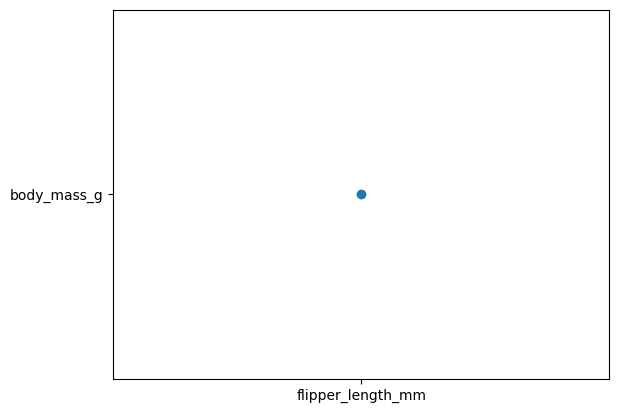

In [51]:
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['flipper_length_mm'].fillna(df['body_mass_g'].mean())

In [10]:
# peng_target

In [17]:
#from sklearn.impute import SimpleImputer

# 결측치를 평균값으로 대체
#imputer = SimpleImputer(strategy='mean')
#peng_data_imputed = imputer.fit_transform(peng_data)


In [18]:
from sklearn.model_selection import train_test_split

In [21]:
train_input, test_input, train_target, test_target = \
train_test_split(peng_data_imputed , peng_target)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [24]:
kn.score(test_input, test_target['species'])

0.8985507246376812

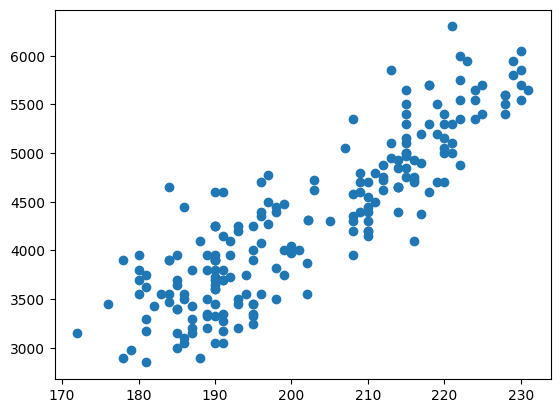

In [59]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1]) 




In [27]:
df['flipper_length_mm'].dtype

dtype('float64')

In [53]:
mean = train_input.mean()
std = train_input.std()

In [54]:
train_scaled = (train_input - mean) / std

In [57]:
plt.scatter(train_scaled['flipper_length_mm'][:, 0], train_scaled['body_mass_g'][:, 1])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices